In [1]:
# cometml Logging
# !pip install comet_ml
import comet_ml
import pandas as pd
import numpy as np
import seaborn as sns
import keras
from sklearn.metrics import classification_report

# Loading the Dataset + Basic Cleaning and EDA

In [2]:
df = pd.read_csv('../datasets/iris_dataset/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df['Species'].value_counts()


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [4]:
#There are 150 entries of data which are not null which makes it cleaned out which is good
#We ll covert species (object) type to a label type.
#We'll sum it up to check whether there are true or false values using boolean value shortcuts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isnull().sum

<bound method DataFrame.sum of         Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0    False          False         False          False         False    False
1    False          False         False          False         False    False
2    False          False         False          False         False    False
3    False          False         False          False         False    False
4    False          False         False          False         False    False
..     ...            ...           ...            ...           ...      ...
145  False          False         False          False         False    False
146  False          False         False          False         False    False
147  False          False         False          False         False    False
148  False          False         False          False         False    False
149  False          False         False          False         False    False

[150 rows x 6 columns]>

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [7]:
species_name = le.classes_
print(species_name)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [8]:
X = df.drop(columns=['Id', 'Species'])
y = df['Species']
X.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [9]:
print(y[:5])

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

In [11]:
x_train.shape

(105, 4)

In [12]:
print(type(x_test))

<class 'pandas.core.frame.DataFrame'>


In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(x_train[:1])
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train[:1])

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
57            4.9           2.4            3.3           1.0
[[-1.14630942 -1.44374444 -0.25650655 -0.258263  ]]


In [14]:
print(type(x_test))

<class 'numpy.ndarray'>


In [15]:
# exporting the StandardScaler
import joblib
# Save the scaler to a file
joblib.dump(sc, '../saved_models/iris_keras_scaler.pkl')


['../saved_models/iris_keras_scaler.pkl']

In [16]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


# Model Building

## CometML Logging

In [17]:
comet_ml.init()

In [18]:
experiment = comet_ml.Experiment(project_name='juan-ai',
                                 auto_histogram_weight_logging=True,
                                 auto_histogram_gradient_logging=True,
                                 auto_histogram_activation_logging=True,)

experiment.set_name('delete_later')

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/wereign/juan-ai/710a19ea1d454cf98caec6c85d794bcd



## Defining Hyper-Parameters

In [19]:
parameters = {
    "epochs":100,
    "optimizer":"Adam",
    "loss":"categorical_crossentropy",
    "validation_split":0.3
}

experiment.log_parameters(parameters)

## Model Creation

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [21]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[-1], )))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

In [22]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 


 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.fit(x_train, y_train, epochs=100, verbose=2)

COMET INFO: Ignoring automatic log_parameter('verbose') because 'keras:verbose' is in COMET_LOGGING_PARAMETERS_IGNORE


Epoch 1/100
4/4 - 2s - loss: 1.0255 - accuracy: 0.4667 - 2s/epoch - 389ms/step
Epoch 2/100
4/4 - 1s - loss: 1.0497 - accuracy: 0.3905 - 712ms/epoch - 178ms/step
Epoch 3/100
4/4 - 0s - loss: 0.9969 - accuracy: 0.4952 - 416ms/epoch - 104ms/step
Epoch 4/100
4/4 - 1s - loss: 0.8936 - accuracy: 0.5714 - 529ms/epoch - 132ms/step
Epoch 5/100
4/4 - 0s - loss: 0.8720 - accuracy: 0.6476 - 302ms/epoch - 76ms/step
Epoch 6/100
4/4 - 1s - loss: 0.8311 - accuracy: 0.6190 - 922ms/epoch - 230ms/step
Epoch 7/100
4/4 - 0s - loss: 0.7912 - accuracy: 0.6095 - 280ms/epoch - 70ms/step
Epoch 8/100
4/4 - 0s - loss: 0.7924 - accuracy: 0.6286 - 383ms/epoch - 96ms/step
Epoch 9/100
4/4 - 1s - loss: 0.7488 - accuracy: 0.6667 - 647ms/epoch - 162ms/step
Epoch 10/100
4/4 - 0s - loss: 0.6930 - accuracy: 0.6667 - 234ms/epoch - 59ms/step
Epoch 11/100
4/4 - 1s - loss: 0.7167 - accuracy: 0.6762 - 545ms/epoch - 136ms/step
Epoch 12/100
4/4 - 1s - loss: 0.6230 - accuracy: 0.7238 - 1s/epoch - 270ms/step
Epoch 13/100
4/4 - 0s -

In [24]:
prediction = model.predict(x_test)
print(prediction[:7])

2/2 [==============================] - 0s 81ms/step
[[9.9969375e-01 3.0322417e-04 3.0519668e-06]
 [5.2176253e-03 9.4110656e-01 5.3675767e-02]
 [9.9772948e-01 2.2440949e-03 2.6435129e-05]
 [4.7337780e-06 9.7558601e-03 9.9023938e-01]
 [9.9770927e-01 2.2524812e-03 3.8163373e-05]
 [9.9967241e-01 3.2403349e-04 3.6162128e-06]
 [4.7554048e-03 9.3640018e-01 5.8844432e-02]]


In [25]:
prediction = np.argmax(prediction, axis=-1)
print(prediction[:7])

[0 1 0 2 0 0 1]


In [26]:
print(y_test[:7])

4      0
58     1
20     0
114    2
31     0
33     0
94     1
Name: Species, dtype: int32


In [28]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      0.92      0.92        12
           2       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, prediction))

0.9555555555555556


In [29]:
cm = confusion_matrix(y_test, prediction)
experiment.log_confusion_matrix(matrix=cm)
print(cm)

[[16  0  0]
 [ 0 11  1]
 [ 0  1 16]]


Text(50.72222222222221, 0.5, 'actual')

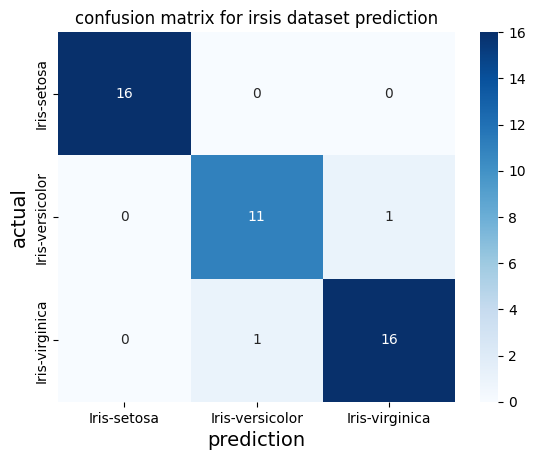

In [30]:
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=species_name, yticklabels=species_name)#0 =setosa , 1 = versicolor , 2 = virginica
ax.set_title('confusion matrix for irsis dataset prediction')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual', fontsize=14)

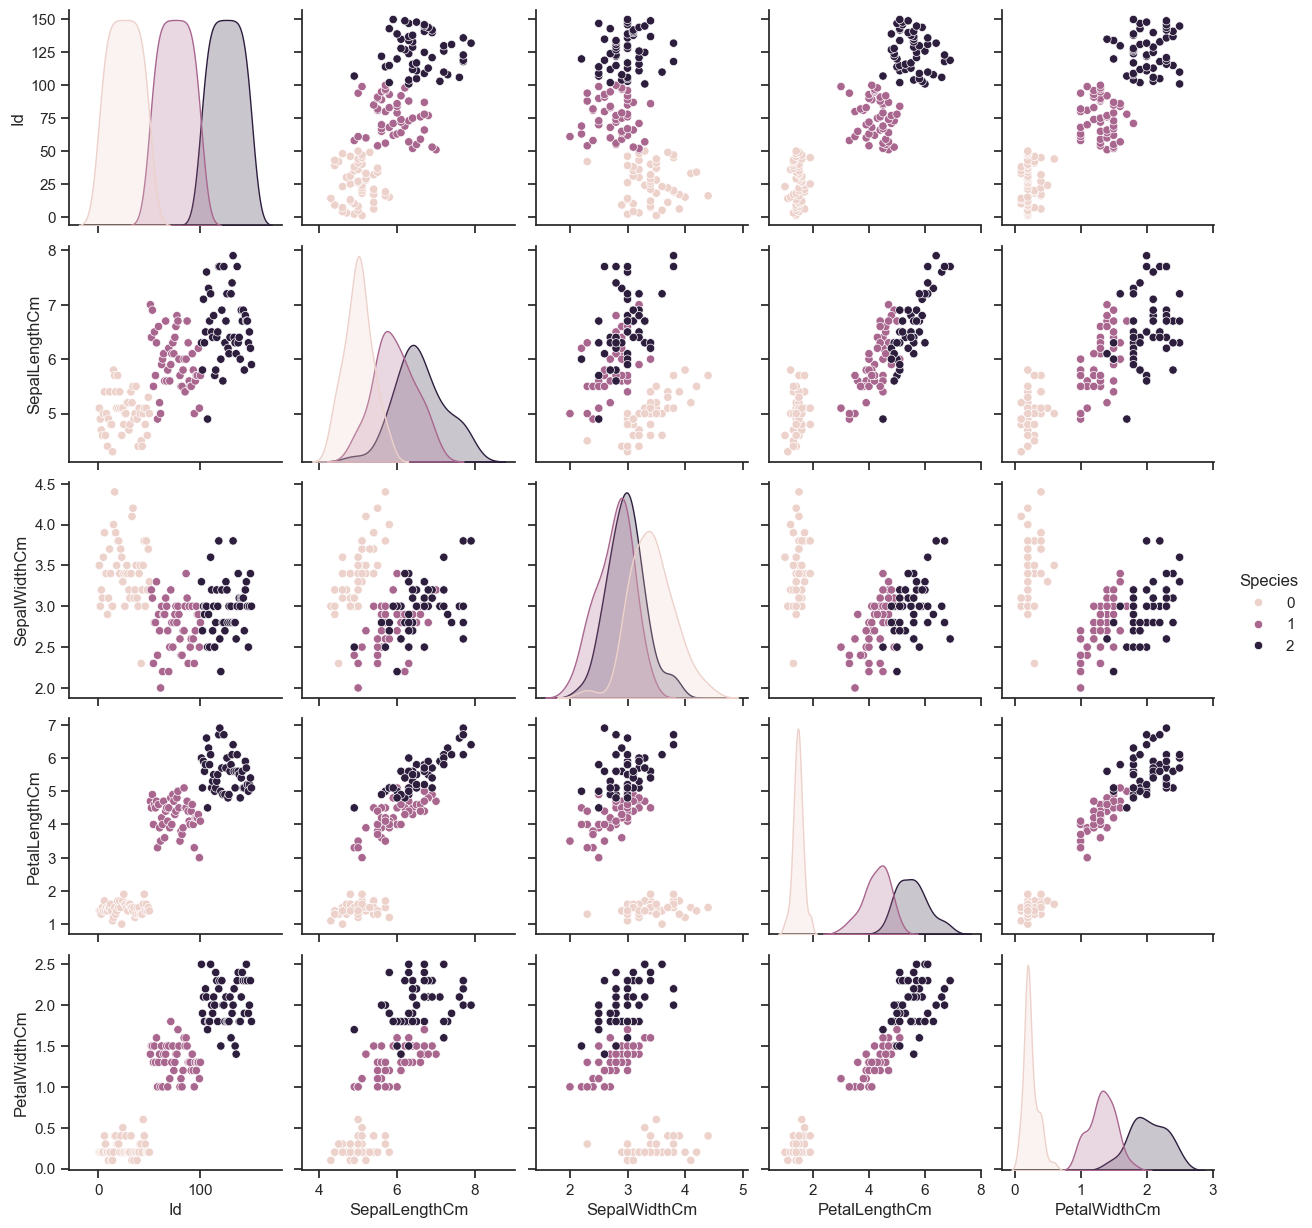

In [31]:
sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(df.iloc[:,0:6], hue="Species")

In [32]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/wereign/juan-ai/710a19ea1d454cf98caec6c85d794bcd
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     accuracy [100]       : (0.39047619700431824, 0.9714285731315613)
COMET INFO:     batch_accuracy [100] : (0.34375, 1.0)


COMET INFO:     batch_loss [100]     : (0.0764666497707367, 1.056603193283081)
COMET INFO:     epoch_duration [100] : (0.03099999999994907, 2.030999999999949)
COMET INFO:     loss [100]           : (0.15016023814678192, 1.0496753454208374)
COMET INFO:   Others:
COMET INFO:     Name             : delete_later
COMET INFO:     trainable_params : 1315
COMET INFO:   Parameters:
COMET INFO:     Adam_amsgrad                 : False
COMET INFO:     Adam_beta_1                  : 0.9
COMET INFO:     Adam_beta_2                  : 0.999
COMET INFO:     Adam_clipnorm                : 1
COMET INFO:     Adam_clipvalue               : 1
COMET INFO:     Adam_ema_momentum            : 0.99
COMET INFO:     Adam_ema_overwrite_frequency : 1
COMET INFO:     Adam_epsilon                 : 1e-07
COMET INFO:     Adam_global_clipnorm         : 1
COMET INFO:     Adam_is_legacy_optimizer     : False
COMET INFO:     Adam_jit_compile             : False
COMET INFO:     Adam_learning_rate           : 0.00100000004

In [33]:
model.save('../saved_models/iris_model2.keras')

In [34]:
loaded_model =keras.models.load_model('../saved_models/iris_model2.keras')

In [35]:
y_pred = loaded_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1)

print(y_pred[:5])

2/2 [==============================] - 0s 2ms/step
[0 1 0 2 0]


In [36]:
print(accuracy_score(y_test,y_pred))

0.9555555555555556
